In [64]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

# import ncar_jobqueue
# from dask.distributed import Client

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import pandas as pd

style.use('default')
import matplotlib.path as mpath
from IPython.display import Image

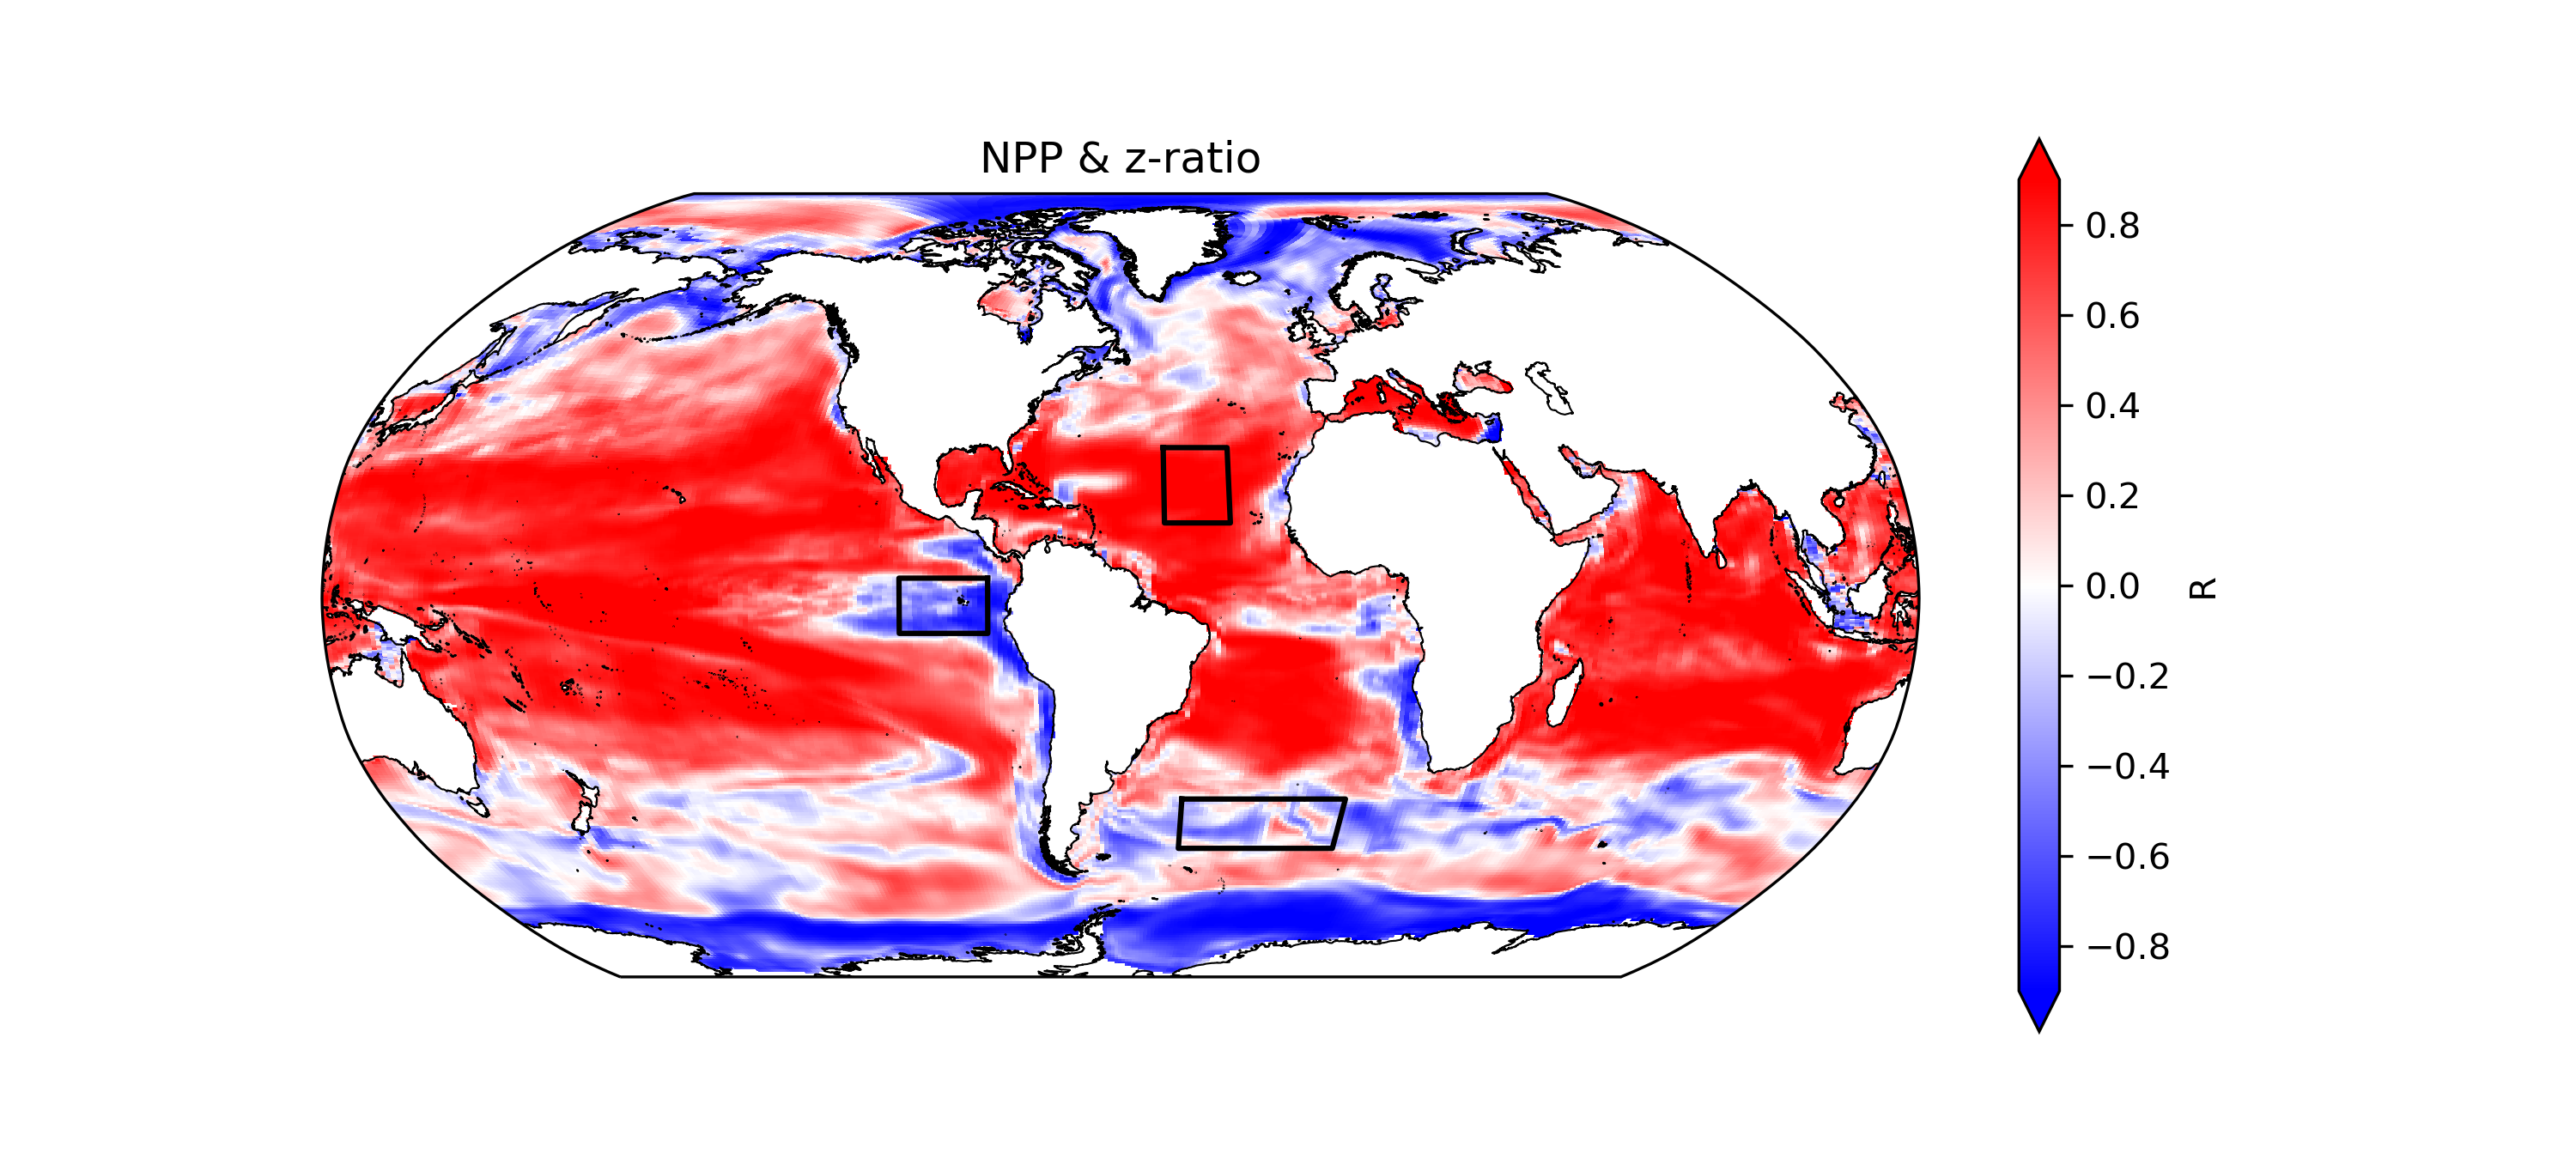

In [2]:
Image(filename='/glade/u/home/kristenk/adding_zooplankton/MARBL_4p4z/images/NPP_zratio_R_withboxes.png')

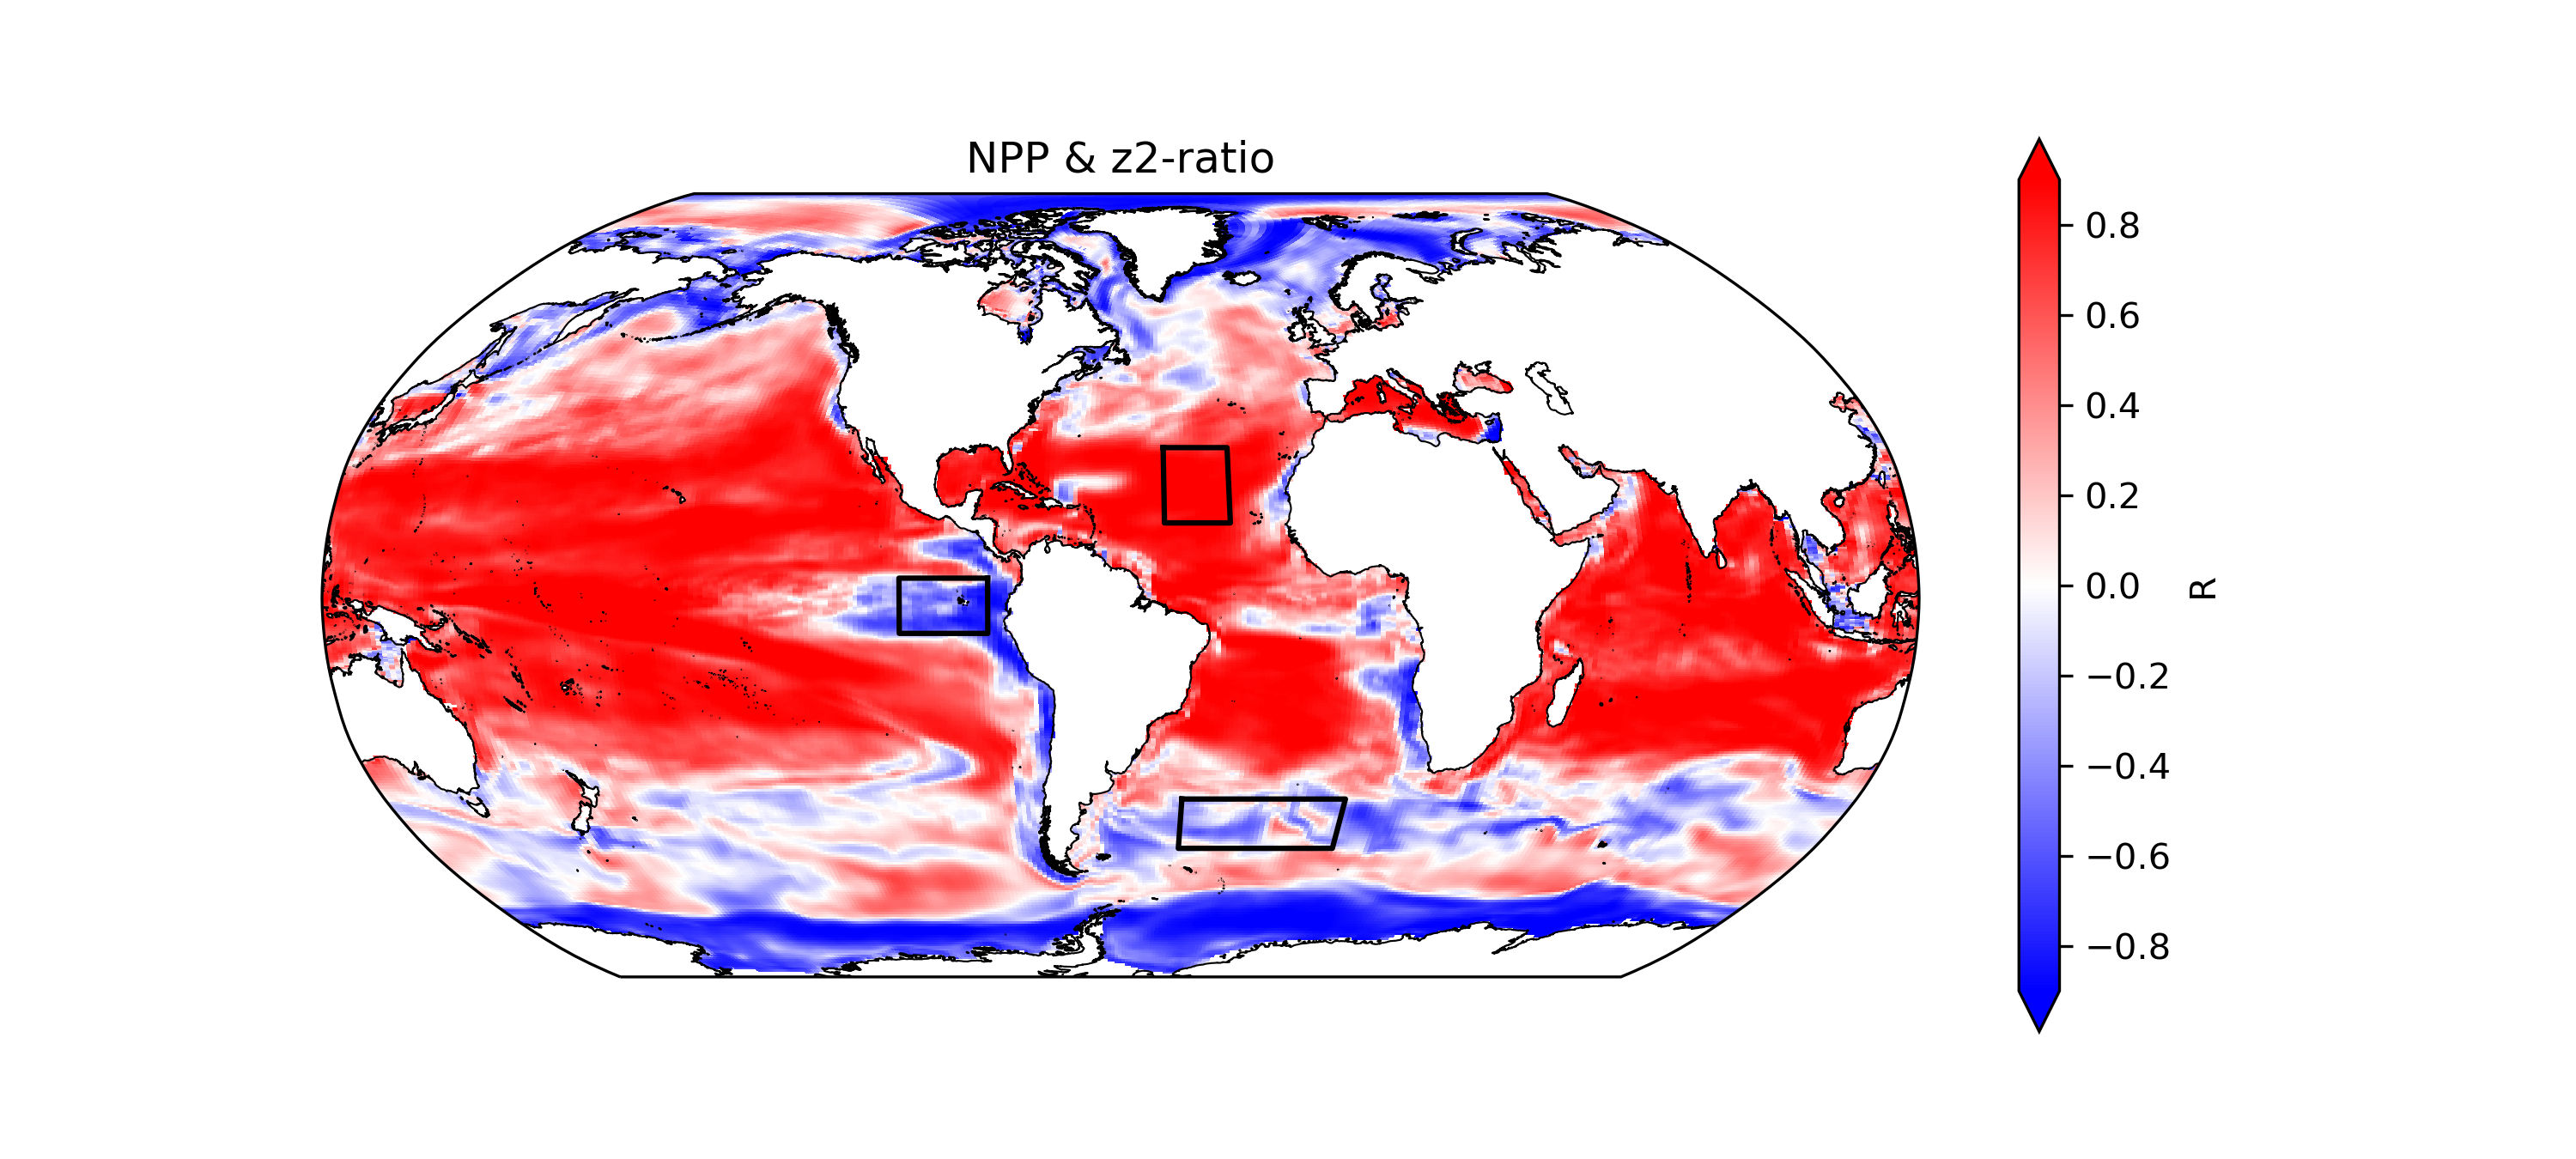

In [3]:
Image(filename='/glade/u/home/kristenk/adding_zooplankton/MARBL_4p4z/images/NPP_z2ratio_R_withboxes.png')

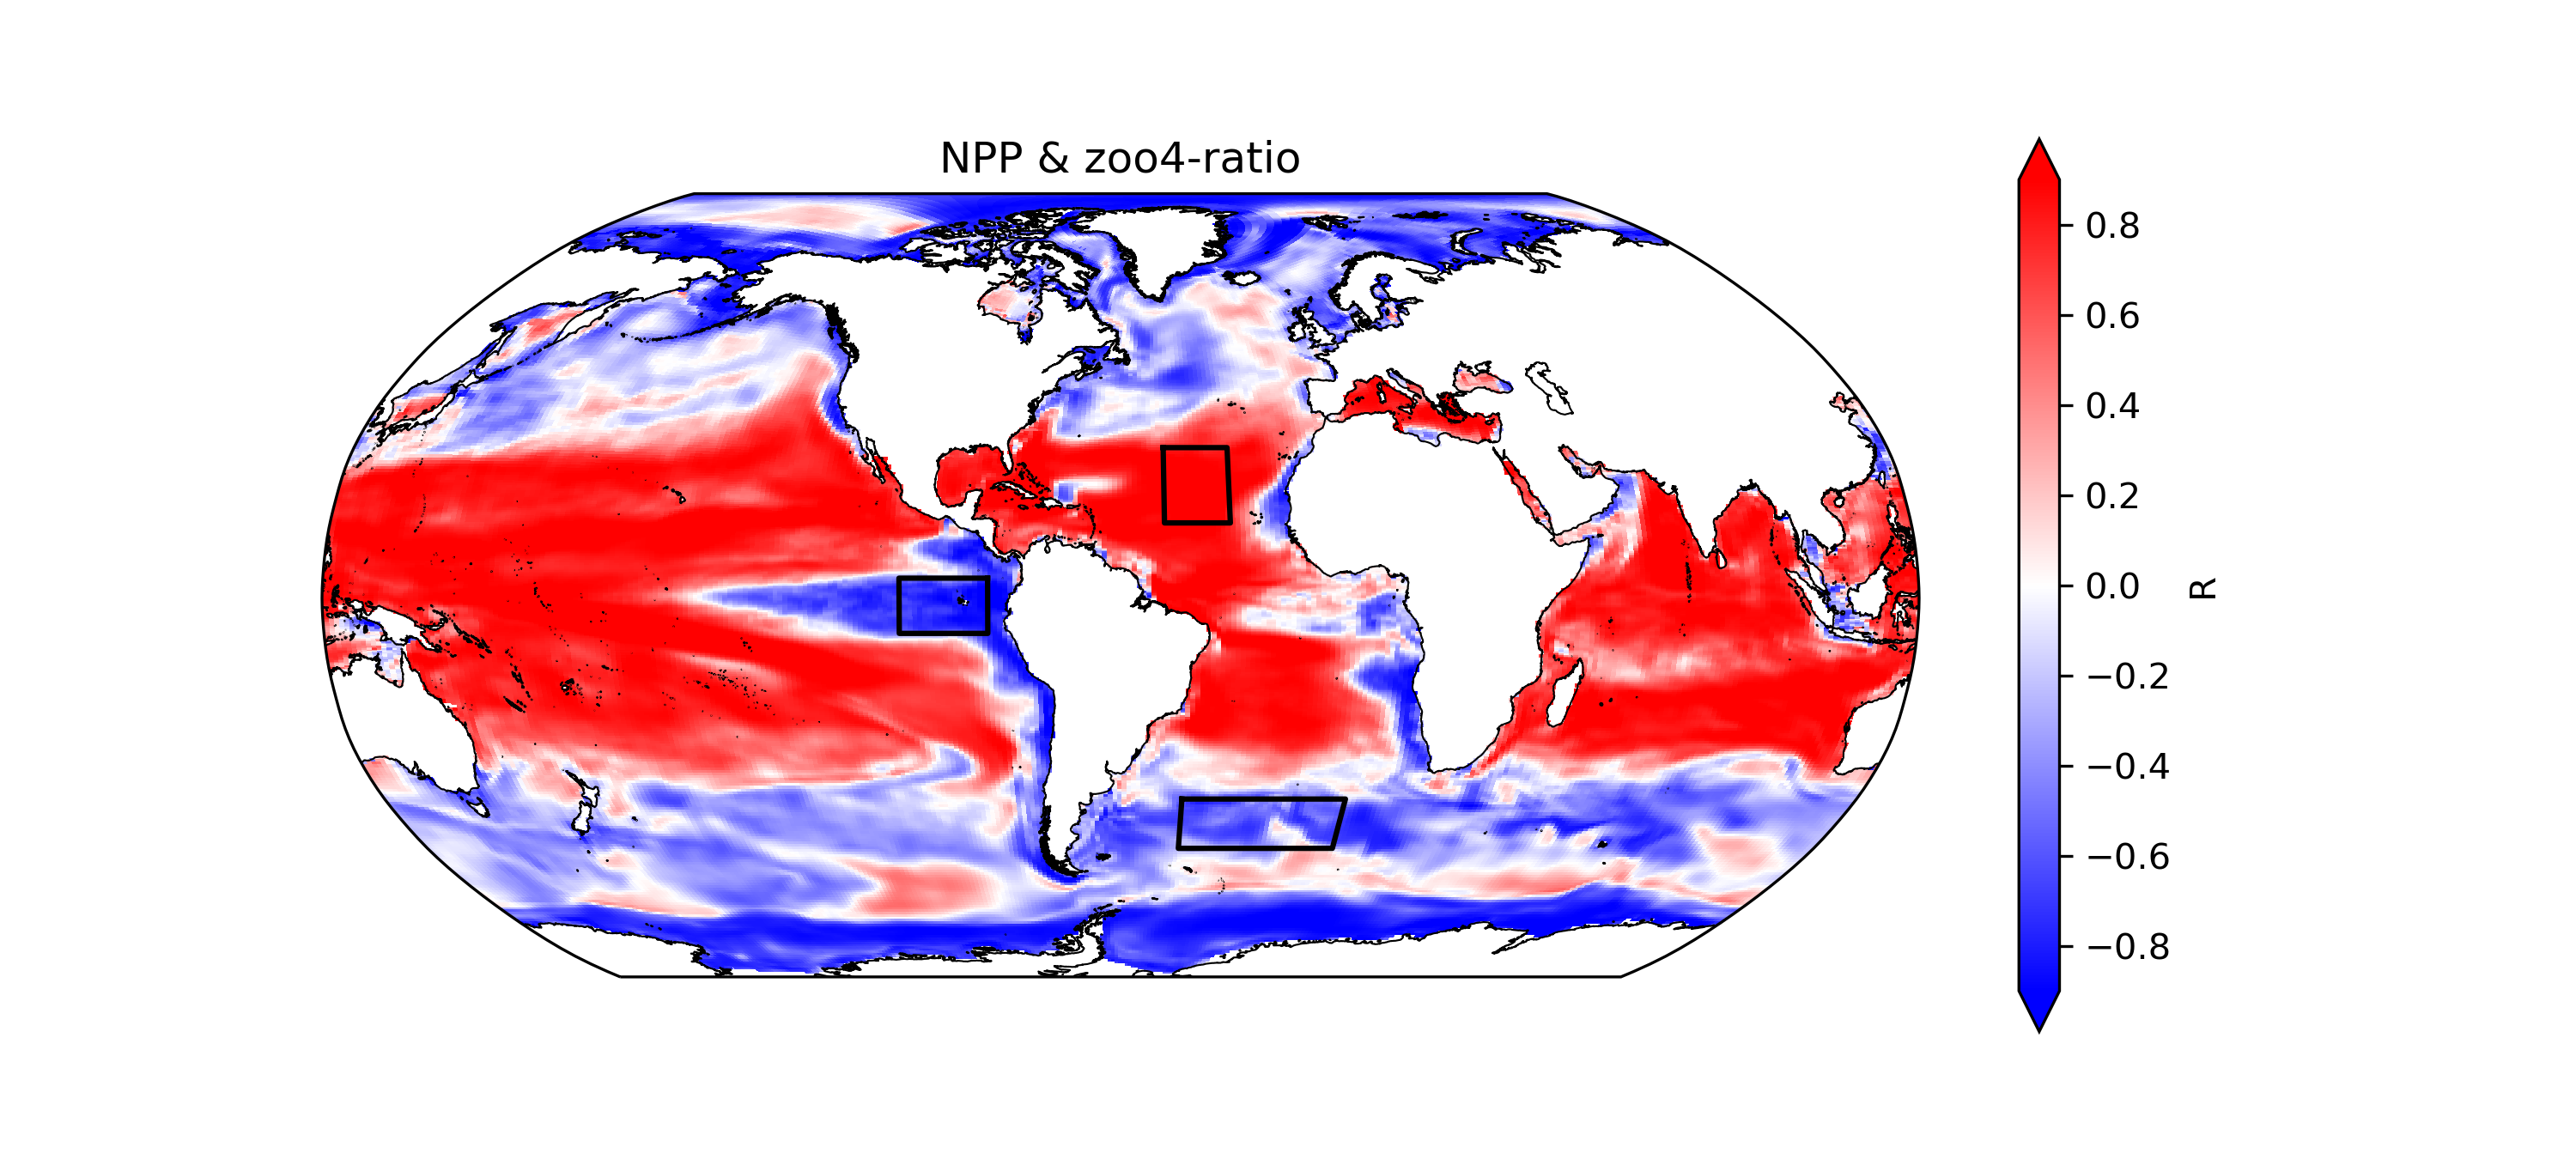

In [4]:
Image(filename='/glade/u/home/kristenk/adding_zooplankton/MARBL_4p4z/images/NPP_zoo4ratio_R_withboxes.png')

In [5]:
case = 'g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004'
variables = ['photoC_TOT_zint','zoo1C','zoo2C','zoo3C','zoo4C',
             'diatC','spC','coccoC',
             'x_graze_zoo3_zint','x_graze_zoo4_zint','x_graze_zoo2_zint','x_graze_zoo1_zint',
             'photoC_diat_zint','photoC_sp_zint','photoC_cocco_zint']
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','REGION_MASK', 'time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

#### get monthly data

In [6]:
%%time

path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'

ds_list = []
print(f'reading {case}')
ds = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.??????-??????.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds = xr.merge((ds, dsv))
    ds_list.append(ds)

reading g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004
photoC_TOT_zint
zoo1C
zoo2C
zoo3C
zoo4C
diatC
spC
coccoC
x_graze_zoo3_zint
x_graze_zoo4_zint
x_graze_zoo2_zint
x_graze_zoo1_zint
photoC_diat_zint
photoC_sp_zint
photoC_cocco_zint
CPU times: user 5.69 s, sys: 450 ms, total: 6.14 s
Wall time: 10.9 s


In [7]:
tmp = ds.zoo1C * 10.
ds['zoo1C_zint'] = tmp.sum(dim='z_t_150m')

tmp = ds.zoo2C * 10.
ds['zoo2C_zint'] = tmp.sum(dim='z_t_150m')
tmp = ds.zoo3C * 10.
ds['zoo3C_zint'] = tmp.sum(dim='z_t_150m')
tmp = ds.zoo4C * 10.
ds['zoo4C_zint'] = tmp.sum(dim='z_t_150m')

ds['HTLfood_zint'] = ds['zoo3C_zint'] + ds['zoo4C_zint']

tmp = ds.diatC * 10.
ds['diatC_zint'] = tmp.sum(dim='z_t_150m')

tmp = ds.spC * 10.
ds['spC_zint'] = tmp.sum(dim='z_t_150m')

tmp = ds.coccoC * 10.
ds['coccoC_zint'] = tmp.sum(dim='z_t_150m')

tmp = ds.x_graze_zoo3_zint / ds.photoC_TOT_zint
ds['zratio'] = tmp

tmp = (ds.x_graze_zoo3_zint + ds.x_graze_zoo4_zint) / ds.photoC_TOT_zint
ds['z2ratio'] = tmp

tmp = (ds.x_graze_zoo4_zint) / ds.photoC_TOT_zint
ds['zoo4ratio'] = tmp

In [8]:
variables = ['photoC_TOT_zint','photoC_diat_zint','photoC_sp_zint','photoC_cocco_zint',
             'zoo1C_zint','zoo2C_zint','zoo3C_zint','zoo4C_zint',
             'diatC_zint','spC_zint','coccoC_zint',
             'x_graze_zoo3_zint','x_graze_zoo4_zint','x_graze_zoo2_zint','x_graze_zoo1_zint',
            'zratio','z2ratio','zoo4ratio']

In [9]:
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

ds = ds.drop([v for v in ds.variables if v not in keep_vars])

In [10]:
ds

<xarray.Dataset>
Dimensions:            (d2: 2, nlat: 384, nlon: 320, time: 732, z_t: 60)
Coordinates:
    TLAT               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_t                (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * time               (time) object 0001-02-01 00:00:00 ... 0062-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    dz                 (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    TAREA              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT                (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    photoC_TOT_zint    (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    time_bound         (time, d2) object dask.array<chunksize=(732, 2), meta=np.ndarray>
    x_graze_zoo3_zint  (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    x_graze_zoo4_zint  (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    x_graze_zoo2_zint  (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    x_graze_zoo1_zint  (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    photoC_diat_zint   (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    photoC_sp_zint     (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    photoC_cocco_zint  (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    zoo1C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    zoo2C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    zoo3C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    zoo4C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    diatC_zint         (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    spC_zint           (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    coccoC_zint        (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    zratio             (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    z2ratio            (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>
    zoo4ratio          (time, nlat, nlon) float32 dask.array<chunksize=(732, 384, 320), meta=np.ndarray>

In [11]:
## clip off first 22 years
ds = ds.isel(time=slice(264,732))
ds

<xarray.Dataset>
Dimensions:            (d2: 2, nlat: 384, nlon: 320, time: 468, z_t: 60)
Coordinates:
    TLAT               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_t                (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * time               (time) object 0023-02-01 00:00:00 ... 0062-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    dz                 (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    TAREA              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT                (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    photoC_TOT_zint    (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    time_bound         (time, d2) object dask.array<chunksize=(468, 2), meta=np.ndarray>
    x_graze_zoo3_zint  (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    x_graze_zoo4_zint  (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    x_graze_zoo2_zint  (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    x_graze_zoo1_zint  (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    photoC_diat_zint   (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    photoC_sp_zint     (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    photoC_cocco_zint  (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    zoo1C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    zoo2C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    zoo3C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    zoo4C_zint         (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    diatC_zint         (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    spC_zint           (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    coccoC_zint        (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    zratio             (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    z2ratio            (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>
    zoo4ratio          (time, nlat, nlon) float32 dask.array<chunksize=(468, 384, 320), meta=np.ndarray>

In [12]:
ds["time"] = ds.time_bound.compute().mean(dim="d2")
ds_monthly_mean = ds.groupby('time.month').mean('time')

In [13]:
ds_monthly_mean

<xarray.Dataset>
Dimensions:            (month: 12, nlat: 384, nlon: 320, z_t: 60)
Coordinates:
    TLAT               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_t                (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * month              (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables:
    dz                 (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    TAREA              (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMT                (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    photoC_TOT_zint    (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    x_graze_zoo3_zint  (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    x_graze_zoo4_zint  (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    x_graze_zoo2_zint  (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    x_graze_zoo1_zint  (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    photoC_diat_zint   (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    photoC_sp_zint     (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    photoC_cocco_zint  (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    zoo1C_zint         (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    zoo2C_zint         (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    zoo3C_zint         (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    zoo4C_zint         (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    diatC_zint         (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    spC_zint           (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    coccoC_zint        (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    zratio             (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    z2ratio            (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    zoo4ratio          (month, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [14]:
%%time
ds_ann = ds.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 4min 13s, sys: 55.2 s, total: 5min 8s
Wall time: 3min 44s


In [15]:
ds_mean = ds_ann.mean(dim='time')

In [16]:
ds_mean

<xarray.Dataset>
Dimensions:            (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
    TLAT               (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.19 72.19
    TLONG              (nlat, nlon) float64 320.6 321.7 322.8 ... 319.4 319.8
  * z_t                (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    dz                 (z_t) float32 1000.0 1000.0 ... 24996.248 24998.121
    TAREA              (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.432e+12
    KMT                (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    photoC_TOT_zint    (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    x_graze_zoo3_zint  (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    x_graze_zoo4_zint  (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    x_graze_zoo2_zint  (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    x_graze_zoo1_zint  (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    photoC_diat_zint   (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    photoC_sp_zint     (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    photoC_cocco_zint  (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    zoo1C_zint         (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zoo2C_zint         (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zoo3C_zint         (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zoo4C_zint         (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    diatC_zint         (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    spC_zint           (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    coccoC_zint        (nlat, nlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zratio             (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    z2ratio            (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    zoo4ratio          (nlat, nlon) float32 nan nan nan nan ... nan nan nan nan

In [17]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lons=ds_grid.TLONG
lats=ds_grid.TLAT
area=ds_grid.TAREA
area_m=ds_grid.TAREA * 1.e-4
depths=ds_grid.z_t * 0.01
tlen=len(ds_ann.time)
years = np.arange(1980,1980+tlen,1)

In [18]:
lons_norm=np.full((384, 320), np.nan)

lons_norm_firstpart = lons.where(lons<=180.)
lons_norm_secpart = lons.where(lons>180.) - 360.

lons_norm_firstpart = np.asarray(lons_norm_firstpart)
lons_norm_secpart = np.asarray(lons_norm_secpart)

lons_norm[~np.isnan(lons_norm_firstpart)] = lons_norm_firstpart[~np.isnan(lons_norm_firstpart)]
lons_norm[~np.isnan(lons_norm_secpart)] = lons_norm_secpart[~np.isnan(lons_norm_secpart)]

lons_norm=xr.DataArray(lons_norm)
lons_norm=lons_norm.rename({'dim_0':'nlat'})
lons_norm=lons_norm.rename({'dim_1':'nlon'})

### Define boxes (same as in correlation plots)

In [19]:
#box #1, subtropical atlantic
box1_latmin = 15.
box1_latmax = 30.
box1_lonmin = -45.
box1_lonmax = -30.

#box #2, subantarctic SO
box2_latmin = -50.
box2_latmax = -40.
box2_lonmin = -40.
box2_lonmax = -0.

#box #3, eq Pac
box3_latmin = -7.
box3_latmax = 4.
box3_lonmin = -105.
box3_lonmax = -85.

### Calculate mean state, annual timeseries, and monthly climatology for each region

In [20]:
### MEANS

box1_means = xr.Dataset()
box2_means = xr.Dataset()
box3_means = xr.Dataset()

for var in variables:
    masked = ds_mean[var].where(lats<box1_latmax).where(lats>box1_latmin).where(lons_norm<box1_lonmax).where(lons_norm>box1_lonmin)
    box1_means[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    
    masked = ds_mean[var].where(lats<box2_latmax).where(lats>box2_latmin).where(lons_norm<box2_lonmax).where(lons_norm>box2_lonmin)
    box2_means[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    
    masked = ds_mean[var].where(lats<box3_latmax).where(lats>box3_latmin).where(lons_norm<box3_lonmax).where(lons_norm>box3_lonmin)
    box3_means[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    

In [21]:
### ANNUAL TIMESERIES

box1_ts = xr.Dataset({v: ds_ann[v] for v in ['time']})
box2_ts = xr.Dataset({v: ds_ann[v] for v in ['time']})
box3_ts = xr.Dataset({v: ds_ann[v] for v in ['time']})

for var in variables:
    masked = ds_ann[var].where(lats<box1_latmax).where(lats>box1_latmin).where(lons_norm<box1_lonmax).where(lons_norm>box1_lonmin)
    box1_ts[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    
    masked = ds_ann[var].where(lats<box2_latmax).where(lats>box2_latmin).where(lons_norm<box2_lonmax).where(lons_norm>box2_lonmin)
    box2_ts[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    
    masked = ds_ann[var].where(lats<box3_latmax).where(lats>box3_latmin).where(lons_norm<box3_lonmax).where(lons_norm>box3_lonmin)
    box3_ts[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()

In [22]:
%%time
### MONTHLY CLIMATOLOGY

box1_monclim = xr.Dataset({v: ds_monthly_mean[v] for v in ['month']})
box2_monclim = xr.Dataset({v: ds_monthly_mean[v] for v in ['month']})
box3_monclim = xr.Dataset({v: ds_monthly_mean[v] for v in ['month']})

for var in variables:
    masked = ds_monthly_mean[var].where(lats<box1_latmax).where(lats>box1_latmin).where(lons_norm<box1_lonmax).where(lons_norm>box1_lonmin)
    box1_monclim[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    
    masked = ds_monthly_mean[var].where(lats<box2_latmax).where(lats>box2_latmin).where(lons_norm<box2_lonmax).where(lons_norm>box2_lonmin)
    box2_monclim[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()
    
    masked = ds_monthly_mean[var].where(lats<box3_latmax).where(lats>box3_latmin).where(lons_norm<box3_lonmax).where(lons_norm>box3_lonmin)
    box3_monclim[var] = esmlab.weighted_mean(masked, weights=area_m, dim=['nlat', 'nlon']).compute()

CPU times: user 11min 4s, sys: 2min 4s, total: 13min 8s
Wall time: 13min 1s


In [23]:
### annual anomalies
box1_ts_anoms = xr.Dataset({v: ds_ann[v] for v in ['time']})
box2_ts_anoms = xr.Dataset({v: ds_ann[v] for v in ['time']})
box3_ts_anoms = xr.Dataset({v: ds_ann[v] for v in ['time']})

for var in variables:
    box1_ts_anoms[var] = box1_ts[var] - box1_means[var]

    box2_ts_anoms[var] = box2_ts[var] - box2_means[var]
    
    box3_ts_anoms[var] = box3_ts[var] - box3_means[var]

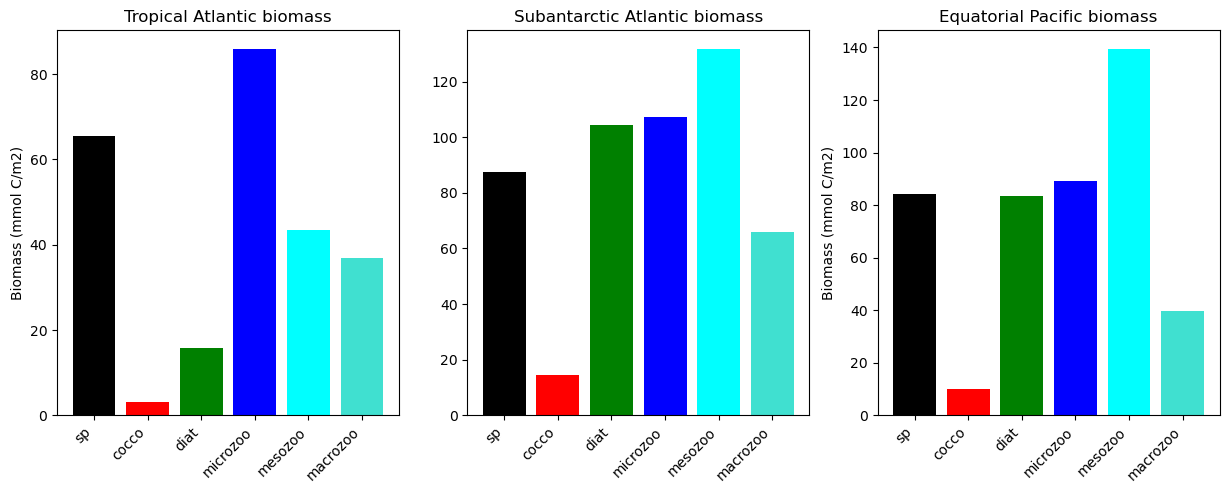

In [24]:
#Biomass structure
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(15,5))

labels=['sp', 'cocco', 'diat','microzoo','mesozoo','macrozoo']
ind=[0,1,2,3,4,5]

# BOX 1
vals=[box1_means['spC_zint'],box1_means['coccoC_zint'],
      box1_means['diatC_zint'],(box1_means['zoo1C_zint'] + box1_means['zoo2C_zint']),
      box1_means['zoo3C_zint'],box1_means['zoo4C_zint']]

ax[0].set_title('Tropical Atlantic biomass')
ax[0].bar(ind, vals,color=['black', 'red', 'green', 'blue', 'cyan','turquoise'])
ax[0].set_ylabel('Biomass (mmol C/m2)')
#ax.set_ylim(0,0.4)
plt.sca(ax[0])
plt.xticks(ind, labels,rotation=45, ha='right')


# BOX 2
vals=[box2_means['spC_zint'],box2_means['coccoC_zint'],
      box2_means['diatC_zint'],(box2_means['zoo1C_zint'] + box2_means['zoo2C_zint']),
      box2_means['zoo3C_zint'],box2_means['zoo4C_zint']]

ax[1].set_title('Subantarctic Atlantic biomass')
ax[1].bar(ind, vals,color=['black', 'red', 'green', 'blue', 'cyan','turquoise'])
#ax.set_ylim(0,0.4)
plt.sca(ax[1])
plt.xticks(ind, labels,rotation=45, ha='right')


# BOX 3
vals=[box3_means['spC_zint'],box3_means['coccoC_zint'],
      box3_means['diatC_zint'],(box3_means['zoo1C_zint'] + box3_means['zoo2C_zint']),
      box3_means['zoo3C_zint'],box3_means['zoo4C_zint']]

ax[2].set_title('Equatorial Pacific biomass')
ax[2].bar(ind, vals,color=['black', 'red', 'green', 'blue', 'cyan','turquoise'])
ax[2].set_ylabel('Biomass (mmol C/m2)')
#ax.set_ylim(0,0.4)
plt.sca(ax[2])
plt.xticks(ind, labels,rotation=45, ha='right');


In [25]:
box1_means

<xarray.Dataset>
Dimensions:            ()
Data variables:
    photoC_TOT_zint    float64 0.03643
    photoC_diat_zint   float64 0.005365
    photoC_sp_zint     float64 0.02856
    photoC_cocco_zint  float64 0.001043
    zoo1C_zint         float64 27.99
    zoo2C_zint         float64 57.96
    zoo3C_zint         float64 43.37
    zoo4C_zint         float64 36.85
    diatC_zint         float64 15.71
    spC_zint           float64 65.42
    coccoC_zint        float64 3.099
    x_graze_zoo3_zint  float64 0.001227
    x_graze_zoo4_zint  float64 0.0001344
    x_graze_zoo2_zint  float64 0.002748
    x_graze_zoo1_zint  float64 0.006262
    zratio             float64 0.03082
    z2ratio            float64 0.03394
    zoo4ratio          float64 0.003117

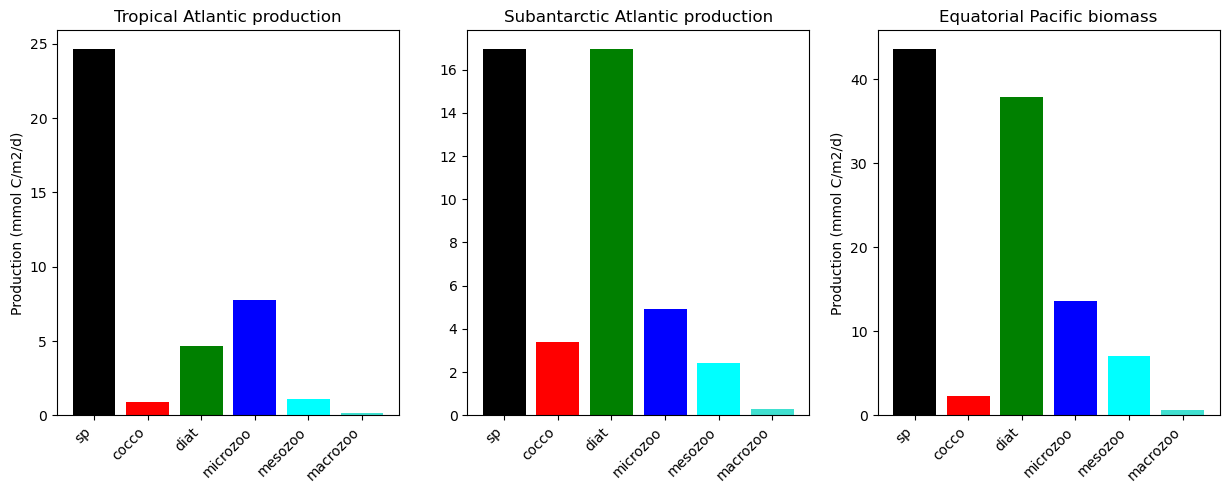

In [26]:
#production structure

fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(15,5))

labels=['sp', 'cocco', 'diat','microzoo','mesozoo','macrozoo']
ind=[0,1,2,3,4,5]

# BOX 1
vals=[box1_means['photoC_sp_zint']*864.,box1_means['photoC_cocco_zint']*864.,
      box1_means['photoC_diat_zint']*864.,(box1_means['x_graze_zoo1_zint']*864. + box1_means['x_graze_zoo2_zint']*864.),
      box1_means['x_graze_zoo3_zint']*864.,box1_means['x_graze_zoo4_zint']*864.]

ax[0].set_title('Tropical Atlantic production')
ax[0].bar(ind, vals,color=['black', 'red', 'green', 'blue', 'cyan','turquoise'])
ax[0].set_ylabel('Production (mmol C/m2/d)')
#ax.set_ylim(0,0.4)
plt.sca(ax[0])
plt.xticks(ind, labels,rotation=45, ha='right')


# BOX 2
vals=[box2_means['photoC_sp_zint']*864.,box2_means['photoC_cocco_zint']*864.,
      box2_means['photoC_diat_zint']*864.,(box2_means['x_graze_zoo1_zint']*864. + box2_means['x_graze_zoo2_zint']*864.),
      box2_means['x_graze_zoo3_zint']*864.,box2_means['x_graze_zoo4_zint']*864.]

ax[1].set_title('Subantarctic Atlantic production')
ax[1].bar(ind, vals,color=['black', 'red', 'green', 'blue', 'cyan','turquoise'])
#ax.set_ylim(0,0.4)
plt.sca(ax[1])
plt.xticks(ind, labels,rotation=45, ha='right')


# BOX 3
vals=[box3_means['photoC_sp_zint']*864.,box3_means['photoC_cocco_zint']*864.,
      box3_means['photoC_diat_zint']*864.,(box3_means['x_graze_zoo1_zint']*864. + box3_means['x_graze_zoo2_zint']*864.),
      box3_means['x_graze_zoo3_zint']*864.,box3_means['x_graze_zoo4_zint']*864.]

ax[2].set_title('Equatorial Pacific biomass')
ax[2].bar(ind, vals,color=['black', 'red', 'green', 'blue', 'cyan','turquoise'])
ax[2].set_ylabel('Production (mmol C/m2/d)')
#ax.set_ylim(0,0.4)
plt.sca(ax[2])
plt.xticks(ind, labels,rotation=45, ha='right');


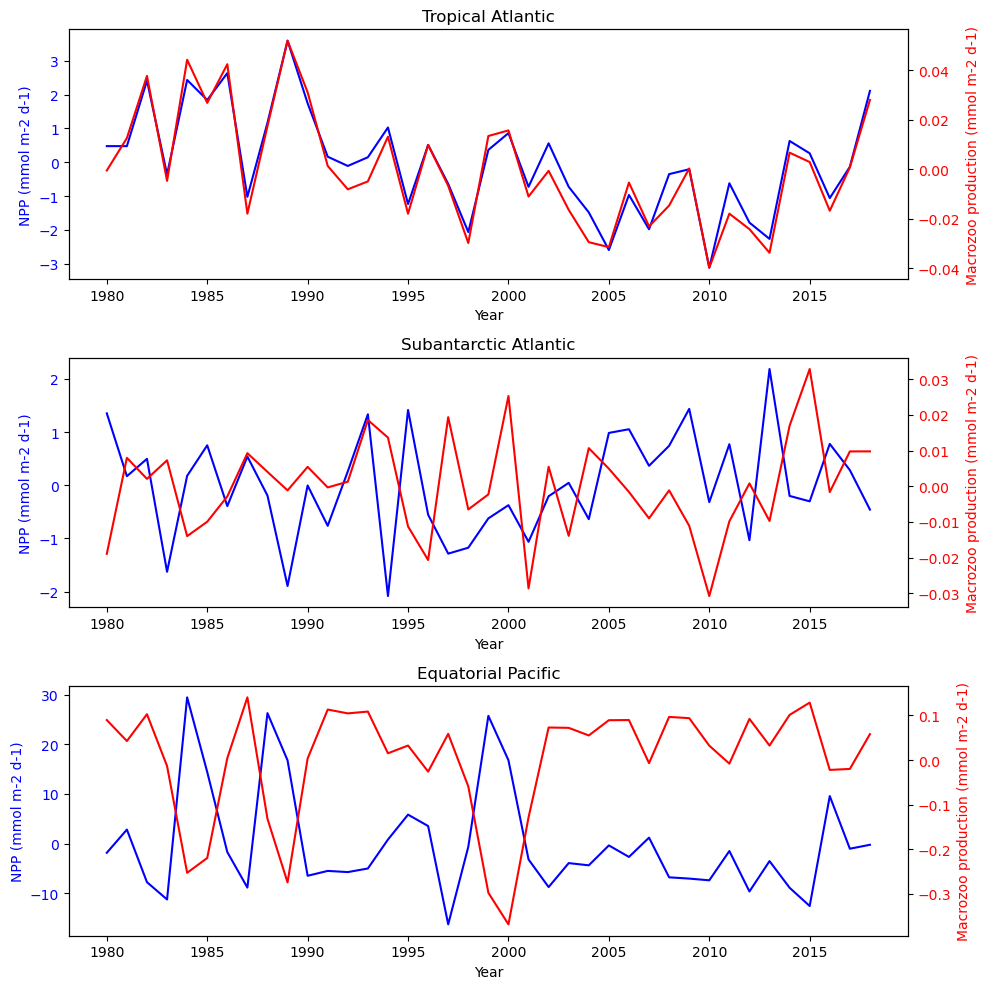

In [27]:
fig, ax1 = plt.subplots(ncols=1,nrows=3,figsize=(10,10))

### BOX 1
ax1[0].set_xlabel('Year')
ax1[0].set_title('Tropical Atlantic')
ax1[0].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[0].tick_params(axis='y', labelcolor='blue')
ax1[0].plot(years, box1_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[0].twinx()

ax2.set_ylabel('Macrozoo production (mmol m-2 d-1)', color='red')
ax2.plot(years, box1_ts_anoms['x_graze_zoo4_zint']* 864., color='red',label='macrozoo production')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)


### BOX 2
ax1[1].set_xlabel('Year')
ax1[1].set_title('Subantarctic Atlantic')
ax1[1].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[1].tick_params(axis='y', labelcolor='blue')
ax1[1].plot(years, box2_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[1].twinx()

ax2.set_ylabel('Macrozoo production (mmol m-2 d-1)', color='red')
ax2.plot(years, box2_ts_anoms['x_graze_zoo4_zint']* 864., color='red',label='macrozoo production')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)

### BOX 3
ax1[2].set_xlabel('Year')
ax1[2].set_title('Equatorial Pacific')
ax1[2].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[2].plot(years, box3_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[2].twinx()

ax2.set_ylabel('Macrozoo production (mmol m-2 d-1)', color='red')
ax2.plot(years, box3_ts_anoms['x_graze_zoo4_zint']* 864., color='red',label='macrozoo production')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

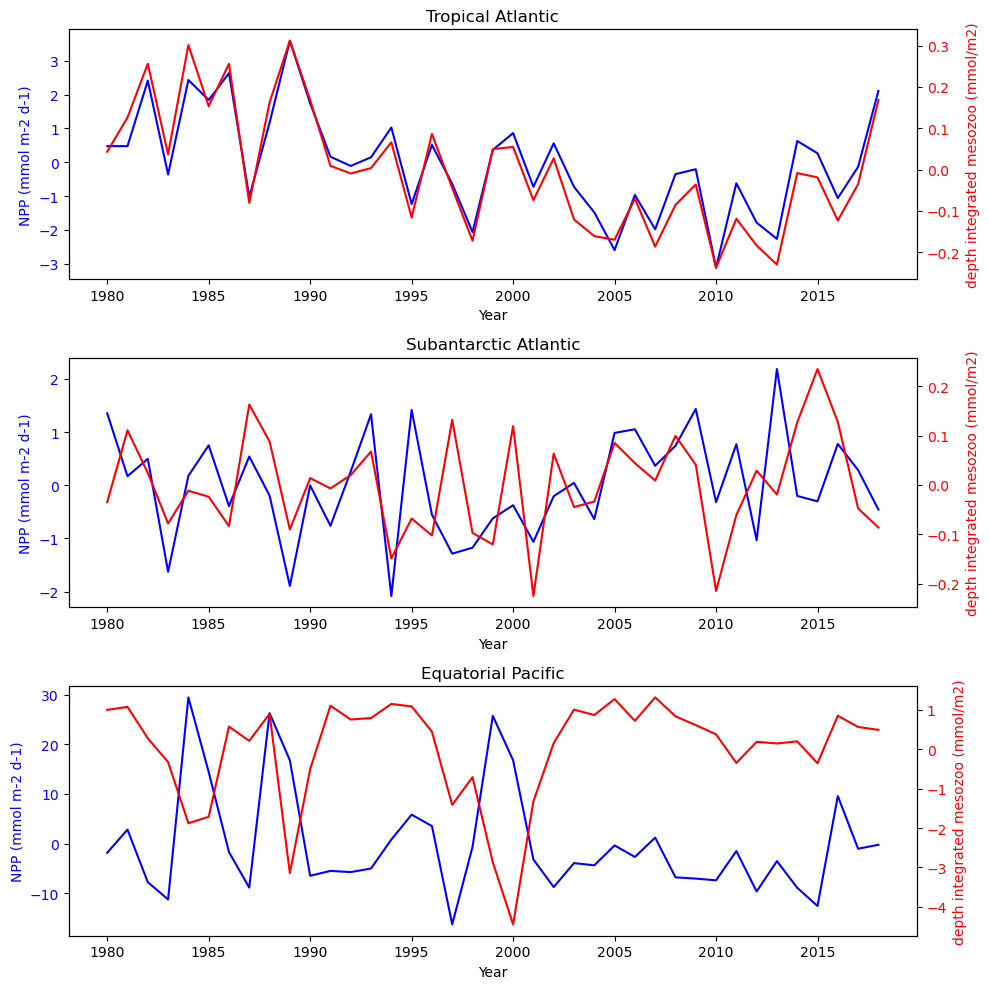

In [28]:
fig, ax1 = plt.subplots(ncols=1,nrows=3,figsize=(10,10))

### BOX 1
ax1[0].set_xlabel('Year')
ax1[0].set_title('Tropical Atlantic')
ax1[0].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[0].tick_params(axis='y', labelcolor='blue')
ax1[0].plot(years, box1_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[0].twinx()

ax2.set_ylabel('depth integrated mesozoo (mmol/m2)', color='red')
ax2.plot(years, box1_ts_anoms['x_graze_zoo3_zint']* 864., color='red',label='mesozoo production')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)


### BOX 2
ax1[1].set_xlabel('Year')
ax1[1].set_title('Subantarctic Atlantic')
ax1[1].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[1].tick_params(axis='y', labelcolor='blue')
ax1[1].plot(years, box2_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[1].twinx()

ax2.set_ylabel('depth integrated mesozoo (mmol/m2)', color='red')
ax2.plot(years, box2_ts_anoms['x_graze_zoo3_zint']* 864., color='red',label='mesozoo production')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)

### BOX 3
ax1[2].set_xlabel('Year')
ax1[2].set_title('Equatorial Pacific')
ax1[2].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[2].plot(years, box3_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[2].twinx()

ax2.set_ylabel('depth integrated mesozoo (mmol/m2)', color='red')
ax2.plot(years, box3_ts_anoms['x_graze_zoo3_zint']* 864., color='red',label='mesozoo production')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

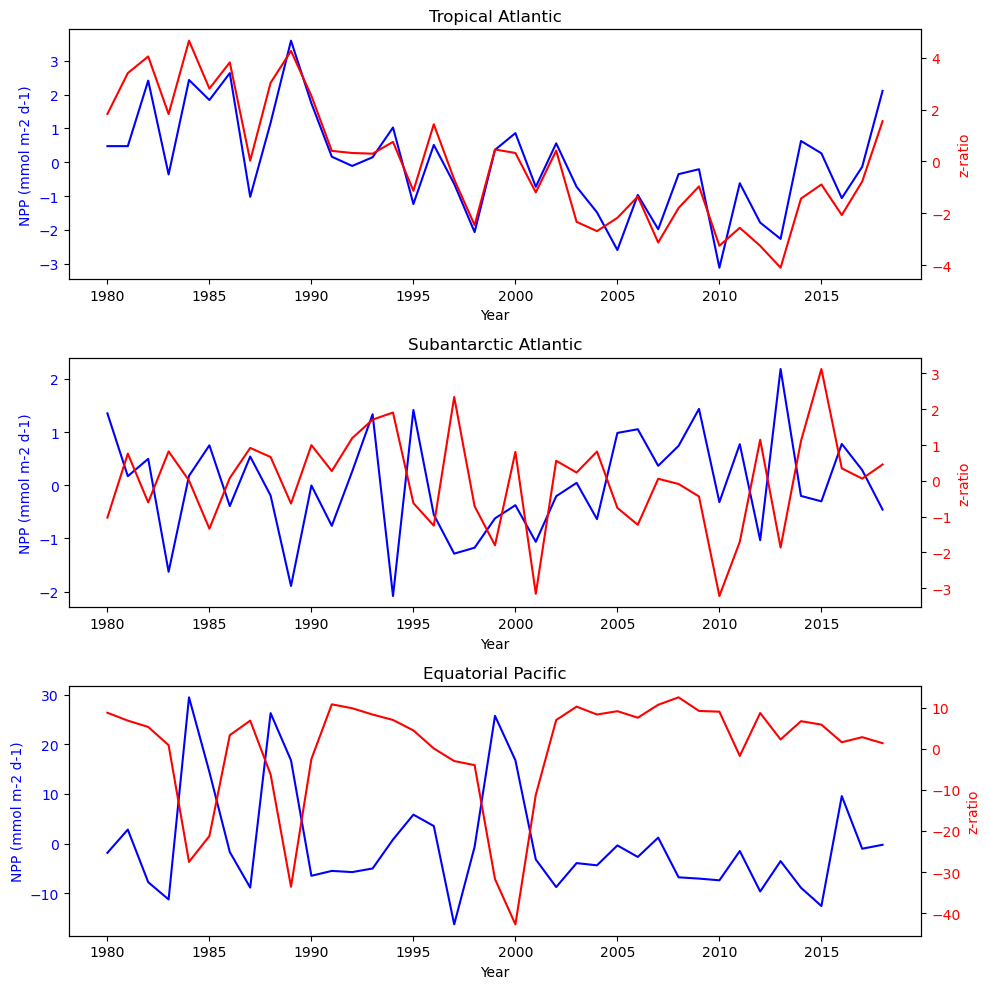

In [29]:
fig, ax1 = plt.subplots(ncols=1,nrows=3,figsize=(10,10))

### BOX 1
ax1[0].set_xlabel('Year')
ax1[0].set_title('Tropical Atlantic')
ax1[0].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[0].tick_params(axis='y', labelcolor='blue')
ax1[0].plot(years, box1_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[0].twinx()

ax2.set_ylabel('z-ratio', color='red')
ax2.plot(years, box1_ts_anoms['zratio']* 864., color='red',label='z-ratio')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)


### BOX 2
ax1[1].set_xlabel('Year')
ax1[1].set_title('Subantarctic Atlantic')
ax1[1].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[1].tick_params(axis='y', labelcolor='blue')
ax1[1].plot(years, box2_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[1].twinx()

ax2.set_ylabel('z-ratio', color='red')
ax2.plot(years, box2_ts_anoms['zratio']* 864., color='red',label='z-ratio')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)

### BOX 3
ax1[2].set_xlabel('Year')
ax1[2].set_title('Equatorial Pacific')
ax1[2].set_ylabel('NPP (mmol m-2 d-1)', color='blue')
ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[2].plot(years, box3_ts_anoms['photoC_TOT_zint']* 864., color='blue',label='NPP')

ax2 = ax1[2].twinx()

ax2.set_ylabel('z-ratio', color='red')
ax2.plot(years, box3_ts_anoms['zratio']* 864., color='red',label='z-ratio')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_xticks(years)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

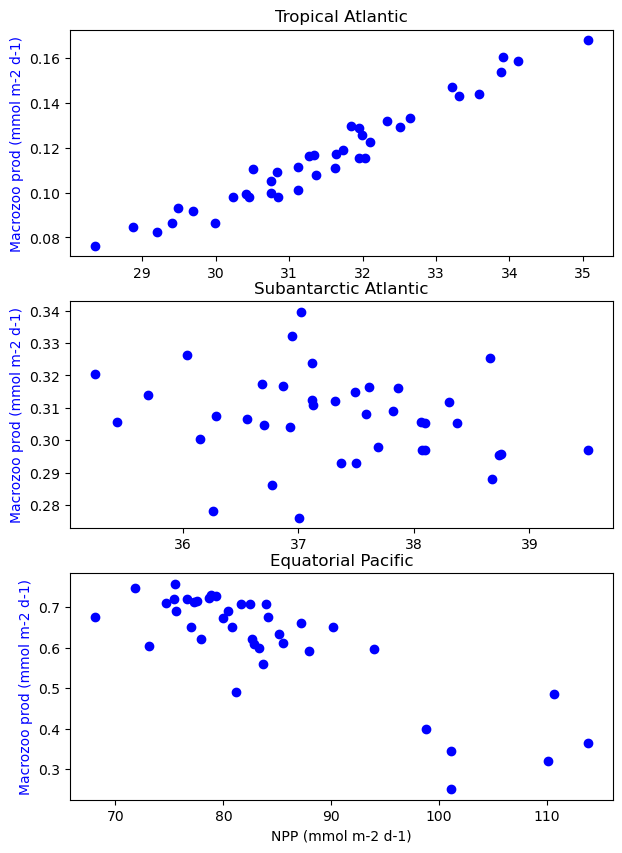

In [30]:
fig, ax1 = plt.subplots(ncols=1,nrows=3,figsize=(7,10))

### BOX 1
#ax1[0].set_xlabel('NPP (mmol m-2 d-1)')
ax1[0].set_title('Tropical Atlantic')
ax1[0].set_ylabel('Macrozoo prod (mmol m-2 d-1)', color='blue')
ax1[0].scatter(box1_ts['photoC_TOT_zint']* 864.,box1_ts['x_graze_zoo4_zint']* 864., color='blue')

### BOX 2
#ax1[1].set_xlabel('NPP (mmol m-2 d-1)')
ax1[1].set_title('Subantarctic Atlantic')
ax1[1].set_ylabel('Macrozoo prod (mmol m-2 d-1)', color='blue')
#ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[1].scatter(box2_ts['photoC_TOT_zint']* 864., box2_ts['x_graze_zoo4_zint']* 864., color='blue')


### BOX 3
ax1[2].set_xlabel('NPP (mmol m-2 d-1)')
ax1[2].set_title('Equatorial Pacific')
ax1[2].set_ylabel('Macrozoo prod (mmol m-2 d-1)', color='blue')
#ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[2].scatter(box3_ts['photoC_TOT_zint']* 864.,box3_ts['x_graze_zoo4_zint']* 864., color='blue')


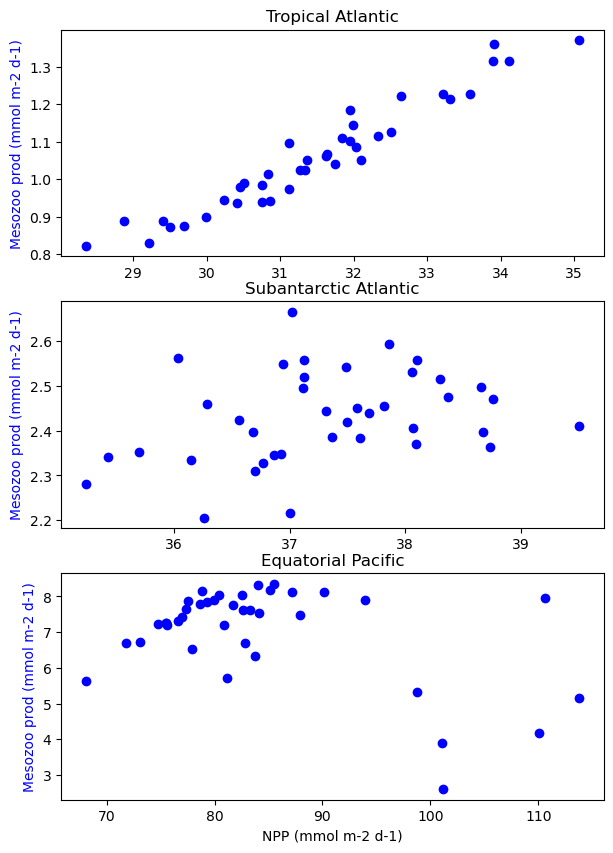

In [31]:
fig, ax1 = plt.subplots(ncols=1,nrows=3,figsize=(7,10))

### BOX 1
#ax1[0].set_xlabel('NPP (mmol m-2 d-1)')
ax1[0].set_title('Tropical Atlantic')
ax1[0].set_ylabel('Mesozoo prod (mmol m-2 d-1)', color='blue')
ax1[0].scatter(box1_ts['photoC_TOT_zint']* 864.,box1_ts['x_graze_zoo3_zint']* 864., color='blue')

### BOX 2
#ax1[1].set_xlabel('NPP (mmol m-2 d-1)')
ax1[1].set_title('Subantarctic Atlantic')
ax1[1].set_ylabel('Mesozoo prod (mmol m-2 d-1)', color='blue')
#ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[1].scatter(box2_ts['photoC_TOT_zint']* 864., box2_ts['x_graze_zoo3_zint']* 864., color='blue')


### BOX 3
ax1[2].set_xlabel('NPP (mmol m-2 d-1)')
ax1[2].set_title('Equatorial Pacific')
ax1[2].set_ylabel('Mesozoo prod (mmol m-2 d-1)', color='blue')
#ax1[2].tick_params(axis='y', labelcolor='blue')
ax1[2].scatter(box3_ts['photoC_TOT_zint']* 864.,box3_ts['x_graze_zoo3_zint']* 864., color='blue')


## Monthly climatologies

### z-ratio

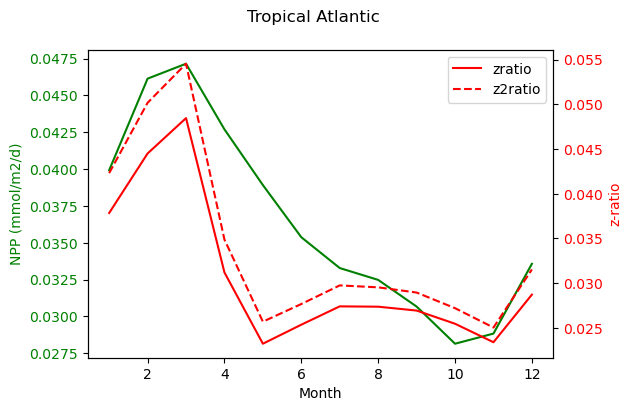

In [63]:
style.use('default')

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(1,1,1)
fig.suptitle('Tropical Atlantic')
ax1.set_ylabel('NPP (mmol/m2/d)', color='green')
ax1.plot(box1_monclim['month'], 
         box1_monclim['photoC_TOT_zint'], 
         color='green', label='NPP')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Month')

ax2=ax1.twinx()
ax2.plot(box1_monclim['month'], 
           box1_monclim['zratio'], 
           color='red', label='zratio')
ax2.plot(box1_monclim['month'], 
           box1_monclim['z2ratio'], 
           color='red', label='z2ratio',linestyle='--')

ax2.set_ylabel('z-ratio', color='red')
ax2.set_xlabel('Month')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend();

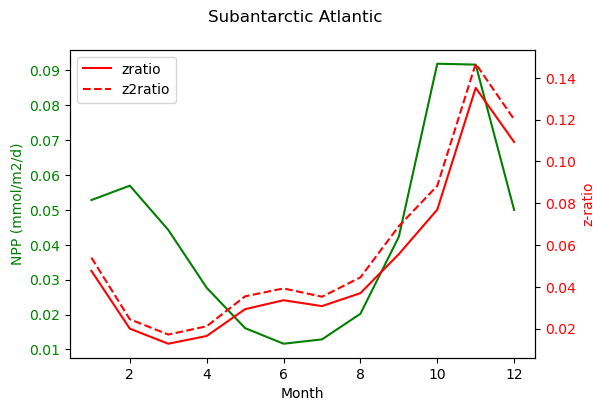

In [50]:
style.use('default')

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(1,1,1)
fig.suptitle('Subantarctic Atlantic')
ax1.set_ylabel('NPP (mmol/m2/d)', color='green')

ax1.plot(box2_monclim['month'], 
         box2_monclim['photoC_TOT_zint'], 
         color='green', label='NPP')
ax1.tick_params(axis='y', labelcolor='green')
#ax1.legend()
ax1.set_xlabel('Month')
ax2=ax1.twinx()
ax2.plot(box2_monclim['month'], 
           box2_monclim['zratio'], 
           color='red', label='zratio')
ax2.plot(box2_monclim['month'], 
           box2_monclim['z2ratio'], 
           color='red', label='z2ratio',linestyle='--')

ax2.set_ylabel('z-ratio', color='red')
ax2.set_xlabel('Month')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend();

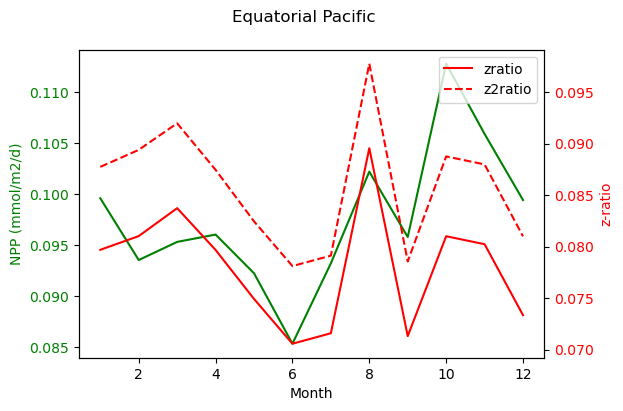

In [61]:
style.use('default')

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(1,1,1)
fig.suptitle('Equatorial Pacific')
ax1.set_ylabel('NPP (mmol/m2/d)', color='green')

ax1.plot(box3_monclim['month'], 
         box3_monclim['photoC_TOT_zint'], 
         color='green', label='NPP')
ax1.tick_params(axis='y', labelcolor='green')
#ax1.legend()
ax1.set_xlabel('Month')
ax2=ax1.twinx()
ax2.plot(box3_monclim['month'], 
           box3_monclim['zratio'], 
           color='red', label='zratio')
ax2.plot(box3_monclim['month'], 
           box3_monclim['z2ratio'], 
           color='red', label='z2ratio',linestyle='--')
ax2.set_ylabel('z-ratio', color='red')
ax2.set_xlabel('Month')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend();

### Macrozoo biomass

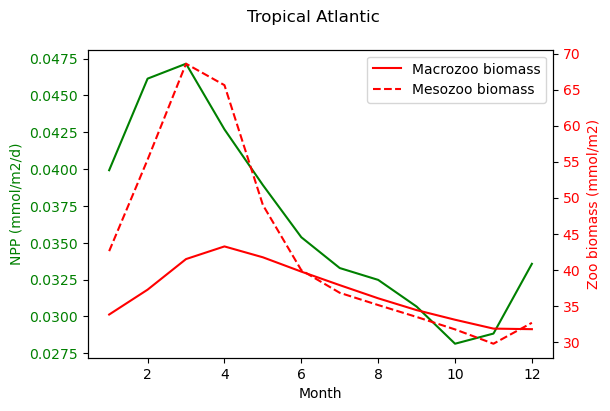

In [58]:
style.use('default')

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(1,1,1)
fig.suptitle('Tropical Atlantic')
ax1.set_ylabel('NPP (mmol/m2/d)', color='green')

ax1.plot(box1_monclim['month'], 
         box1_monclim['photoC_TOT_zint'], 
         color='green', label='NPP')
ax1.tick_params(axis='y', labelcolor='green')
#ax1.legend()
ax1.set_xlabel('Month')
ax2=ax1.twinx()
ax2.plot(box1_monclim['month'], 
           box1_monclim['zoo4C_zint'], 
           color='red', label='Macrozoo biomass')
ax2.plot(box1_monclim['month'], 
           box1_monclim['zoo3C_zint'], 
           color='red', label='Mesozoo biomass',linestyle='--')
ax2.set_ylabel('Zoo biomass (mmol/m2)', color='red')
ax2.set_xlabel('Month')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend();

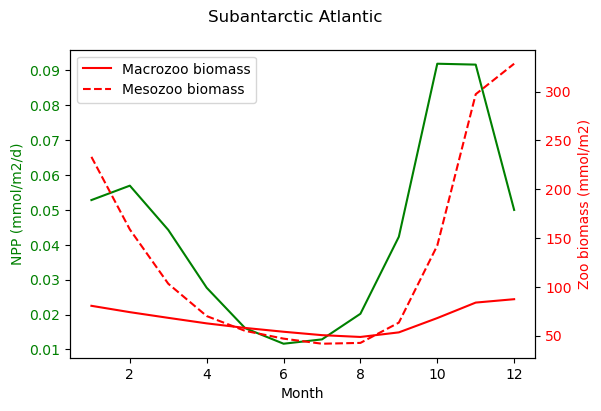

In [59]:
style.use('default')

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(1,1,1)
fig.suptitle('Subantarctic Atlantic')
ax1.set_ylabel('NPP (mmol/m2/d)', color='green')

ax1.plot(box2_monclim['month'], 
         box2_monclim['photoC_TOT_zint'], 
         color='green', label='NPP')
ax1.tick_params(axis='y', labelcolor='green')
#ax1.legend()
ax1.set_xlabel('Month')
ax2=ax1.twinx()
ax2.plot(box2_monclim['month'], 
           box2_monclim['zoo4C_zint'], 
           color='red', label='Macrozoo biomass')
ax2.plot(box2_monclim['month'], 
           box2_monclim['zoo3C_zint'], 
           color='red', label='Mesozoo biomass',linestyle='--')
ax2.set_ylabel('Zoo biomass (mmol/m2)', color='red')
ax2.set_xlabel('Month')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend();

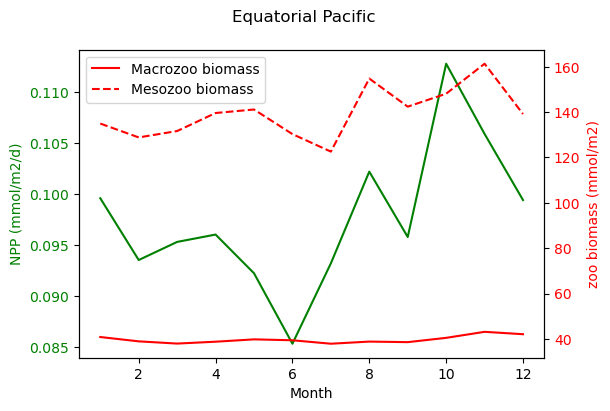

In [60]:
style.use('default')

fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(1,1,1)
fig.suptitle('Equatorial Pacific')
ax1.set_ylabel('NPP (mmol/m2/d)', color='green')

ax1.plot(box3_monclim['month'], 
         box3_monclim['photoC_TOT_zint'], 
         color='green', label='NPP')
ax1.tick_params(axis='y', labelcolor='green')
#ax1.legend()
ax1.set_xlabel('Month')
ax2=ax1.twinx()
ax2.plot(box3_monclim['month'], 
           box3_monclim['zoo4C_zint'], 
           color='red', label='Macrozoo biomass')
ax2.plot(box3_monclim['month'], 
           box3_monclim['zoo3C_zint'], 
           color='red', label='Mesozoo biomass',linestyle='--')
ax2.set_ylabel('zoo biomass (mmol/m2)', color='red')
ax2.set_xlabel('Month')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend();